#### *Step by Step implementation of training models*

______________________________________________________________________________________________________________


#### Contents (click to link)<br>

[Import the required libraries](#import_id)

[Import and investigate the dataset](#investigate_id)

[Observations](#observations_id)

[Clean the data](#clean_id)

[Train the model, Score it and Analyze the accuracy with scikit learn](#train_id)

[Fit linear and polynomial regressions to the data with scikit learn](#fit_id)

[Analyse the accuracy using sklearn features](#score_id)

[Create a model using keras, then evaluate](#keras_id)

[Plot and Visualise All Model Outputs](#plot_id)

[Predict](#predict_id)

[Saving the models: Serialisation and Deserialisation using sklearn’s joblib and keras model.save()](#pickle_id)

[Summary and observations of models](#summary_id)

[References](#references_id)

#### Import the required libraries <a id='import_id'></a>

In [3]:
# import numpy package for arrays,lists of lists of numbers
import numpy as numpy
# pandas "excel for python", good for spreadsheets and dataframes
import pandas as pd
#sklearn the library for data mining
import sklearn as sklearn
import sklearn.linear_model as lin
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import seaborn as sns
# import matplotlib.pyplot for plotting  
import matplotlib.pyplot as plt 
#magic function, renders the plots in this notebook
%matplotlib inline
# For neural networks.
import keras as kr
# For preprocessing data.
import sklearn.preprocessing as pre
# For splitting data sets.
import sklearn.model_selection as mod
#to "serialise" sklearn models
import joblib
#to serialise keras models
from keras.models import load_model




 

#### Import and investigate the dataset
<a id='investigate_id'></a>

In [4]:
powerproduction=pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")
powerproduction.describe()
#print(powerproduction)

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


In [ ]:
sns.pairplot(powerproduction)

#### Observations
<a id='observations_id'></a>

I can observe several null values in the dataset and the pairplot.  
 
Wind turbines are designed to operate within particular parameters. The "cut-in" and "cut-out" speeds are decided on prior to construction.  It takes a particular wind speed to maintain the movement of the rotor blades and generate power.  A high wind speed will cause damage to the mechanisms.

While missing values in a data set can be meaningful, I have decided that the best way to accurately predict is to remove the null values.  This is because the majority of these fall on either side of the cut in/cut out values. The other more randomly distributed null values can be there for arbitrary reasons. To include this outlying data will take away from the overall upward trajectory - wind blows fast and turbine goes fast too.<br>
This graph from University of Calgary's [Energy Education pages](https://energyeducation.ca/encyclopedia/Wind_power) supports this theory.
![](./Images/WindPowerCurve.jpg)

#### Clean the data
<a id='clean_id'></a>

In [5]:
#Code adapted from https://stackoverflow.com/questions/22649693/drop-rows-with-all-zeros-in-pandas-data-frame
df=powerproduction
cleanpower = df[df.loc[:]!=0].dropna()
#cleanpower
cleanpower_csv_data = cleanpower.to_csv('cleanpower.csv', index = False) 
cleanpower.describe()

,speed,power
count,451.000000,451.000000
mean,13.004302,53.231246
std,6.835979,40.522055
min,0.325000,0.067000
25%,7.344500,8.543500
50%,13.038000,58.168000
75%,18.781500,94.725500
max,24.399000,113.556000


#### Train the model, Score it and Analyze the accuracy with scikit learn
<a id='train_id'></a>
Training data and test data are two important concepts in machine learning and it is common to partition a single set of supervised observations into training and test sets. I will demonstrate the technique.

The training data consists of observations (one observed input windspeed and one output variable of power in this case).
The algorithm uses training data to learn and the test set is a different set of observations used to evaluate the performance of the model.

It's important to make sure that the test set does not contain examples from the training set because that makes it difficult to assess whether the algorithm is working correctly.

In [6]:
#Divide the data set into X and y where X (windspeed) is the independent variable and y (power generated) is the dependent variable.
#This breakdown is applicable for both regression styles
speed = cleanpower.speed.to_numpy()
y = cleanpower.power.to_numpy()
#even though you've only one input value it must be reshaped when using scikit learn
X = speed.reshape(-1, 1)


#### Fit linear and polynomial regressions to the data with scikit learn.
<a id='fit_id'></a>

##### Regression
In this step, I'll introduce regression - a fundamental concept in Machine Learning.
Regression is where the relationship between variables is interrogated to reveal the line that best describes it.  Once this can be ascertained, a pre-existing equation can be used to make predictions. <br>
This might be surprising to somebody who comes to ML believing it to be technology native to the 21st century and their dataset which they believe to be unique.  <br>
Machine Learning is built upon hundreds years of academic explorations in maths and statistics where the theory of numbers and the behaviour of their distributions is well established.  <br>

A style of regression is chosen and the corresponding modelling from scikit learn can be applied to the data and used to test the hypothesis.
I will explore linear and polynomial regression below.

* Linear is a commonly used predictive analysis for continuous growth which may be suitable for the generation of power as the line grows, at a glance, in a straight-ish line.
* Polynomial is a form of linear regression and is useful where one variable is dependent on another.  That is the case in this scenario- windspeed affects the power generated.

In [7]:
#Adapted from Machine Learning Tutorial Python - 7: Training and Testing Data
#https://www.youtube.com/watch?v=fwY9Qv96DJY
from sklearn.model_selection import train_test_split
#Split the data set observations into 70 % train 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
#len(y_test)
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
#fitting the linear regression model to the dataset
lin_reg.fit(X_train, y_train)

LinearRegression()

In [8]:
#fitting the polynomial regression model to the dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn import model_selection


poly_reg=PolynomialFeatures(degree=4)
#fit_transform() is equivalent to apply fit() and then transform()
X_trainpoly=poly_reg.fit_transform(X_train)
polyreg=LinearRegression()
polyreg.fit(X_trainpoly, y_train)

X_test_poly = poly_reg.fit_transform(X_test)

#### Analyse the accuracy using sklearn features
<a id='score_id'></a>

I've called score and intercept functions on the data to score the models that I have created.

sklearn's score() function returns the coefficient of determination R^2 of the prediction.

The coefficient of determination also known as the R-squared value is used to evaluate the fit of a linear model.

There are probably lots of unknown factors affecting the measurement, for example, A Clifton et al 2013 carried out indepth research to conclude that : 
>The power output from the turbine is not a linear function of wind speed, it is a complex non-linear function of hub height, wind speed, turbulence intensity and rotor disk shear.

R-square value measures how much of the variance in $y$ (the power generated) is determined by $x$ (windspeed).

R is a value between 0 and 1, with one being the best result when the lines fit well with the data set.

The results show that the polynomial regression is a better fit for the data.

In [ ]:
r = lin_reg.score(X_test,y_test)
print ("The linear regression score out of 1.0 is:\n",(r))
polyr = polyreg.score(X_test_poly,y_test)#find out the r value, how well the lines fits the data set
print ("The polynomial regression score out of 1.0 is:\n",(polyr))


In [ ]:
p = [lin_reg.intercept_, lin_reg.coef_[0]]
polyp =[[polyreg.intercept_, lin_reg.coef_[0]]]
print ("The linear regression intercepts are:\n",(p))
print ("The polynomial regression intercepts are:\n",(polyp))


#### Create a model using keras, then evaluate
<a id='keras_id'></a>

###### About TensorFlow and keras
TensorFlow is a comprehensive platform of open source software that can be used for all stages of building and deploying Machine Learning applications.  Keras is a library built on top of TensorFlow and is suitable for regression problems.

I will use this software to carry out similar tasks to sklearn previously.

The installation of this software was something of a mini-project in itself.
The standard installation of "conda install TensorFlow" at the command line was successful but the software would not work on jupyter.  I discovered that this issue has it's own discussion page on github where programmers and software developers of all levels discuss bugs and workarounds.  

It was a satisfying experience to find a solution that made sense in my case and actually worked. 

In addition to uninstalling and reinstalling the TensorFlow package, there was an additional step of going into site-packages directory on the C Drive, deleting all "tensorflow" directories manually.  I'm sure this process will be applicable to other installation problems in the future.


In [9]:
#code adapted from Regression in keras lecture Ian McLoughlin
#Split the data set observations into 70 % train 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
#Instantiate the model:
kerasmodel = kr.models.Sequential()


* The Sequential model option is used in this instance.  It allows a deep learning model to be created, layer upon connected layer can be added.  

* The sigmoid shape is a suitable fit for the powerproduction dataset curve.

* Glorot Uniform is a good kernal and bias initializer to use in examples such as this when there is a single hidden layer.

In [10]:
#Add layers to the model
#layer one
kerasmodel.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
#layer two
kerasmodel.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
#compile the model
#lr = learning rate Optimizer, passing that is so the model doesn't train too quickly, by controlling the learning rate, losses can be reduced
#Optimizer (to control the learning rate, thus reducing the losses) and Loss function
kerasmodel.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')

In [11]:
#fit the model
# batch_size : Integer or NULL. Number of samples per gradient update. If unspecified, batch_size will default to 32.
#pass ten in at a time
kerasmodel.fit(X_train, y_train, epochs=500, batch_size=10)

Epoch 1/500
32/32 [==============================] - 0s 2ms/step - loss: 4264.7280
Epoch 2/500
32/32 [==============================] - 0s 2ms/step - loss: 4134.4209
Epoch 3/500
32/32 [==============================] - 0s 2ms/step - loss: 3996.2817
Epoch 4/500
32/32 [==============================] - 0s 2ms/step - loss: 3845.1902
Epoch 5/500
32/32 [==============================] - 0s 2ms/step - loss: 3690.6624
Epoch 6/500
32/32 [==============================] - 0s 2ms/step - loss: 3541.3896
Epoch 7/500
32/32 [==============================] - 0s 2ms/step - loss: 3403.4614
Epoch 8/500
32/32 [==============================] - 0s 1ms/step - loss: 3278.3083
Epoch 9/500
32/32 [==============================] - 0s 2ms/step - loss: 3165.5425
Epoch 10/500
32/32 [==============================] - 0s 1ms/step - loss: 3061.5383
Epoch 11/500
32/32 [==============================] - 0s 2ms/step - loss: 2966.0732
Epoch 12/500
32/32 [==============================] - 0s 1ms/step - loss: 2875.9788
E

32/32 [==============================] - 0s 1ms/step - loss: 61.0054
Epoch 197/500
32/32 [==============================] - 0s 1ms/step - loss: 60.6370
Epoch 198/500
32/32 [==============================] - 0s 2ms/step - loss: 60.2745
Epoch 199/500
32/32 [==============================] - 0s 1ms/step - loss: 59.9457
Epoch 200/500
32/32 [==============================] - 0s 1ms/step - loss: 59.6233
Epoch 201/500
32/32 [==============================] - 0s 1ms/step - loss: 59.5331
Epoch 202/500
32/32 [==============================] - 0s 1ms/step - loss: 59.0055
Epoch 203/500
32/32 [==============================] - 0s 1ms/step - loss: 58.9438
Epoch 204/500
32/32 [==============================] - 0s 1ms/step - loss: 58.5601
Epoch 205/500
32/32 [==============================] - 0s 1ms/step - loss: 58.1992
Epoch 206/500
32/32 [==============================] - 0s 2ms/step - loss: 57.9802
Epoch 207/500
32/32 [==============================] - 0s 1ms/step - loss: 57.7023
Epoch 208/500
32/3

32/32 [==============================] - 0s 1ms/step - loss: 34.1089
Epoch 295/500
32/32 [==============================] - 0s 2ms/step - loss: 33.5328
Epoch 296/500
32/32 [==============================] - 0s 1ms/step - loss: 33.4909
Epoch 297/500
32/32 [==============================] - 0s 2ms/step - loss: 33.2232
Epoch 298/500
32/32 [==============================] - 0s 1ms/step - loss: 33.0693
Epoch 299/500
32/32 [==============================] - 0s 1ms/step - loss: 33.3047
Epoch 300/500
32/32 [==============================] - 0s 1ms/step - loss: 32.9153
Epoch 301/500
32/32 [==============================] - 0s 2ms/step - loss: 32.3924
Epoch 302/500
32/32 [==============================] - 0s 2ms/step - loss: 32.2168
Epoch 303/500
32/32 [==============================] - 0s 2ms/step - loss: 32.0549
Epoch 304/500
32/32 [==============================] - 0s 1ms/step - loss: 32.1919
Epoch 305/500
32/32 [==============================] - 0s 1ms/step - loss: 32.0588
Epoch 306/500
32/3

32/32 [==============================] - 0s 2ms/step - loss: 18.9750
Epoch 491/500
32/32 [==============================] - 0s 1ms/step - loss: 18.9732
Epoch 492/500
32/32 [==============================] - 0s 2ms/step - loss: 18.9596
Epoch 493/500
32/32 [==============================] - 0s 2ms/step - loss: 18.8315
Epoch 494/500
32/32 [==============================] - 0s 2ms/step - loss: 18.9796
Epoch 495/500
32/32 [==============================] - 0s 1ms/step - loss: 18.8248
Epoch 496/500
32/32 [==============================] - 0s 1ms/step - loss: 18.9580
Epoch 497/500
32/32 [==============================] - 0s 1ms/step - loss: 18.8260
Epoch 498/500
32/32 [==============================] - 0s 1ms/step - loss: 18.7186
Epoch 499/500
32/32 [==============================] - 0s 1ms/step - loss: 18.6804
Epoch 500/500
32/32 [==============================] - 0s 2ms/step - loss: 18.6467


In [12]:
#Evaluate to check whether the model is best fit for the given problem and corresponding data.
kerasmodel.evaluate(X_test, y_test)
#fit the model until the lowest loss possible is achieved

5/5 [==============================] - 0s 2ms/step - loss: 20.2360


20.235980987548828

#### Plot and Visualise All Model Outputs
<a id='plot_id'></a>

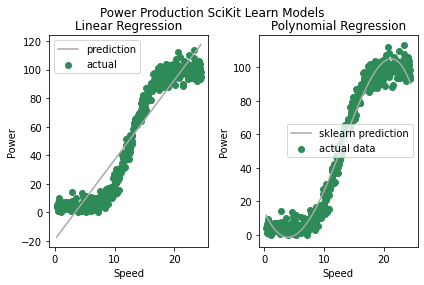

In [19]:

#Visualising the linear regression model results
plt.subplot(1,2,1)
plt.scatter(X,y,color='seagreen',label='actual')
plt.plot(X,lin_reg.predict(X),color='darkgrey',label='prediction')
plt.title('Linear Regression')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.legend();
#Visualising the polynomial regression model results
plt.subplot(1,2,2)#2 is passed in so that this subplot will appear as the second one
X_grid=numpy.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color='seagreen',label='actual data')
plt.plot(X,polyreg.predict(poly_reg.fit_transform(X)),color='darkgrey',label='sklearn prediction')
plt.title('Polynomial Regression')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.suptitle('Power Production SciKit Learn Models')
plt.legend();

In [1]:
#Visualising the model created using neural network
plt.plot(X, y, 'seagreen', label="actual data")
plt.plot(X_test, kerasmodel.predict(X_test), 'darkgrey', label="keras prediction")
plt.title('Using Keras Neural Network - sigmoid')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.suptitle('Power Production')
plt.legend();

NameError: name 'plt' is not defined

#### Predict
<a id='predict_id'></a>
Prediction is the final step and the expected outcome of the model generation.
After the models are created, view predictions by using the predict() function available in both sklearn and keras.<br>

In [27]:
print ("Predict the result with linear regression model\n When speed is 8.5 the power produced is:",
       (lin_reg.predict( [ [8.5] ])) )
print ("Predict the result with polynomial regression model\n When speed is 8.5 the power produced is:",
       ( polyreg.predict( poly_reg.fit_transform([[8.5] ] )) ))
print ("Predict the result with keras sequential model\n When speed is 8.5 the power produced is:",
       (kerasmodel.predict(  [8.5] )))

Predict the result with linear regression model
 When speed is 8.5 the power produced is: [28.16642911]
Predict the result with polynomial regression model
 When speed is 8.5 the power produced is: [14.99964889]
Predict the result with keras sequential model
 When speed is 8.5 the power produced is: [[10.642473]]


#### Saving the model: Serialisation and Deserialisation using sklearn’s joblib and keras model.save()
<a id='pickle_id'></a>

Serialisation is the process of translating the model state into a format that can be stored or transmitted and reconstructed later.

Persist is a similar term in this context which refers to having it available for future use without having to retrain.
Deserialization refers to loading the model back into the workspace when it is required.

The benefit of being able to store a trained model became very apparent while working with keras neural networks.

The training process can take some time to complete - and this is using a dataset with less that 500 entries.

It saves time and computing power to serialise the model, I imagine it would be particularly useful when working on a collaborative project.

In [29]:

#serialisation of the linear regression model
joblib.dump(lin_reg, 'model1.pkl')
#serialisation of the polynomial regression model
joblib.dump(polyreg, 'model2.pkl')
#serialisation of the keras model
# creates a HDF5 file 'model3.h5'
kerasmodel.save('model3.h5')
#deserialisation x3
model = joblib.load('model1.pkl')
polymodel = joblib.load('model2.pkl')
neuralnetwork = load_model('model3.h5')

#Flask can be used now to serve persisted model.
#first,check that the pickling worked

In [38]:
print ("Predict the result with persisted linear regression model\n When speed is 8.5 the power produced is:",
(model.predict( [ [8.5] ] )))
print ("\nPredict the result with persisted polynomial model\n When speed is 8.5 the power produced is:",
( polymodel.predict( poly_reg.fit_transform([ [8.5] ] )) ))
print ("\nPredict the result with persisted keras model\n When speed is 8.5 the power produced is:",
(neuralnetwork.predict(  [8.5]  )))

Predict the result with persisted linear regression model
 When speed is 8.5 the power produced is: [28.16642911]

Predict the result with persisted polynomial model
 When speed is 8.5 the power produced is: [14.99964889]

Predict the result with persisted keras model
 When speed is 8.5 the power produced is: [[10.642473]]


#### Summary and observations of models
<a id='summary_id'></a>

I enjoyed the machine learning aspect of this project. In the face of climate change and the diminishing supply of fossil fuels, who could not be interested in the prospect of generating energy from wind and excited about the quantification of same?

What model provides the best prediction?

I used the score function in sklearn and the evaluate function of keras. 
Sklearn scores between 0 and 1 and those scores were reasonable, keras provides a loss amount instead. 
I had hoped to get a very low loss score on keras but it was generally between 15 and 20 which lead me to believe the prediction would not be accurate.
The predictions are logical - the power produced is a multiple of the windspeed.

I did a very 'analogue' test to satisfy my curiousity - i.e., look at the original dataset and see what they actual observation was at approximately 8.5 windspeed.  The keras model provided the answer closest to 11.422(actual) with a 10.642 (prediction).

I'm glad I 'persisted' with installing the TensorFlow software to enable me to use keras.
I used keras to produce a neural network (this is also possible using sklearn).  A complex computation was carried out on the input data using the bias and the sigmoid activation function which I passed in.   
 
The key learning that I takeaway from this project is that data analysis or machine learning is never as simple as putting data into a function and taking the results to be a truth -it's a process and a practise.

Machine learning requires a deep awareness at every stage of the process: an understanding of the source of the data, the implications of bias, distributions, whether the dataset should be pre-processed and the implications of same.  Then when a model is produced further study is required to interrogate the results - do they really mean what you think they mean or is is it a happy coincidence?

Webservice Next Steps:
Create an API from a machine learning model using Flask<br>
1. Load the already persisted model into memory when the application starts,
2. Create an API endpoint that takes input variables, transforms them into the appropriate format, and returns predictions.

------------------------------------------------------------------------------------------------------------------

## References <a id='references_id'></a>

A Clifton et al (2013) Using machine learning to predict wind turbine power output [Online] Available: https://iopscience.iop.org/article/10.1088/1748-9326/8/2/024009. [Accessed: December 12, 2020].<br>

Ayush Pant (2019)Introduction to Linear Regression and Polynomial Regression [Online] Available: https://towardsdatascience.com/introduction-to-linear-regression-and-polynomial-regression-f8adc96f31cb. [Accessed: December 12, 2020].

Brownlee,Jason (2020). How to Use Polynomial Feature Transforms for Machine Learning [Online] Available: https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/ [Accessed: December 17, 2020]

ImportError: cannot import name 'abs' #20778 [Online]  Available: https://github.com/tensorflow/tensorflow/issues/20778. [Accessed: December 24, 2020].

Introduction to TensorFlow.[Online]  Available: https://www.tensorflow.org/learn . [Accessed: December 24, 2020].

J.M.K.C. Donev et al. (2020). Energy Education - Wind power [Online]. Available: https://energyeducation.ca/encyclopedia/Wind_power. [Accessed: December 12, 2020].

Keras Documentation [Online] Available: https://keras.io/guides/

Machine Learning Tutorial Python - 7: Training and Testing Data [Online] Available: https://www.youtube.com/watch?v=fwY9Qv96DJY. [Accessed: December 12, 2020].

MCLOUGHLIN, IAN 2020. Machine Learning and Statistics - Video Lectures [Online] Available from: https://learnonline.gmit.ie/

Polynomial regression using scikit-learn [Online] Available: https://iq.opengenus.org/polynomial-regression-using-scikit-learn/ . [Accessed: December 12, 2020].

Python Pickle Tutorial datacamp.com https://www.datacamp.com/community/tutorials/pickle-python-tutorial [Accessed: December 17, 2020]

Sayak Paul (2018) Turning Machine Learning Models into APIs in Python[Online] Available:https://www.datacamp.com/community/tutorials/machine-learning-models-api-python [Accessed: December 15, 2020]

The Sequential model in Keras in Python [Online] Available: https://www.codespeedy.com/the-sequential-model-in-keras-in-python/ [Accessed: December 24,2020]

In [ ]:
#### End.